In [1]:


df = pd.DataFrame.from_csv('D:/Nanohub/TribeFlow/TF_location_2015.csv', sep ='\t', encoding = 'UTF-8', header = None)
df.columns = ['ip','resource id','datetime','latitude','longitude']

In [37]:
import pandas as pd
import csv
import numpy 
import time 
from math import radians, cos, sin, asin, sqrt
import re, math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
len(df)

30917

In [4]:
df_unique_ip = df.drop_duplicates(subset = 'ip', keep = 'first')

In [9]:
len(df_unique_ip)

5329

In [24]:
df_unique_ip = df_unique_ip[df_unique_ip['latitude'] != 0.0000]
df_unique_ip.head(5)

,ip,resource id,datetime,latitude,longitude
0,,,,,
392286637,128.211.253.139,15571,2015-01-01 00:07:42,40.4427,-86.9237
392291139,203.130.209.9,9600,2015-01-01 01:05:45,-6.1670,106.8000
392534409,202.170.51.254,5548,2015-01-01 02:10:50,5.4170,100.3330
393196883,196.219.203.100,6549,2015-01-01 06:17:55,-20.1689,57.5133
393205027,193.227.49.2,4186,2015-01-01 07:45:31,30.0500,31.2500


In [26]:
long_dist = []
lat_dist = []
for index,row in df_unique_ip.iterrows():
    lat_dist.append(row['latitude'])
    long_dist.append(row['longitude'])

In [30]:
print (len(long_dist) , len(lat_dist))
lat_dist[8+1]

5329 5329


48.8542

In [34]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees) returned as kilometers 
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

In [49]:
ip_dist = []
for i in range(len(long_dist)):
    for j in range(i+1 , len(long_dist)):
        ip_dist.append(haversine(long_dist[j],long_dist[i],lat_dist[j],lat_dist[i]))

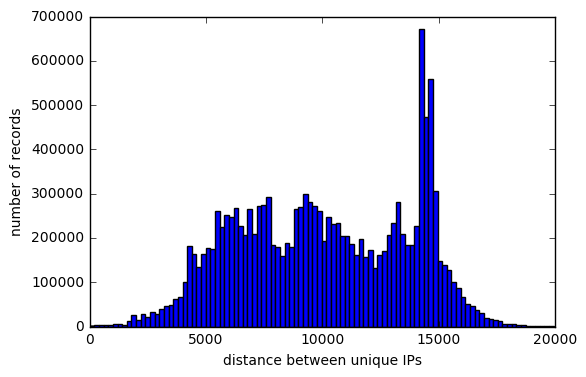

In [48]:
plt.hist(ip_dist,100)
plt.xlabel('distance between unique IPs in kilometers')
plt.ylabel('number of records')

In [43]:
numpy.mean(ip_dist)
numpy.max(ip_dist)

19946.617219378797